In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls 'drive/My Drive/Dataset'

ground_truth.txt  t_100_5.txt  t_10_1.txt  t_10_7.txt  t_50_3.txt  t_50_9.txt
t_100_0.txt	  t_100_6.txt  t_10_2.txt  t_10_8.txt  t_50_4.txt
t_100_1.txt	  t_100_7.txt  t_10_3.txt  t_10_9.txt  t_50_5.txt
t_100_2.txt	  t_100_8.txt  t_10_4.txt  t_50_0.txt  t_50_6.txt
t_100_3.txt	  t_100_9.txt  t_10_5.txt  t_50_1.txt  t_50_7.txt
t_100_4.txt	  t_10_0.txt   t_10_6.txt  t_50_2.txt  t_50_8.txt


In [3]:
root_path = 'drive/My Drive/Dataset'

**Import Used Libraries**

In [4]:
import glob
import numpy as np
from sklearn.cluster import KMeans
import networkx as nx   
import pylab as plt
import math

**Read File Line by Line into matrix given topology_size & file number**

In [5]:
def read_matrices(topology_size, number):
  file = open(root_path + '/t_' + str(topology_size) + '_' + str(number) + '.txt', "r")
  l = [ line.split() for line in file]
  return l

In [6]:
list_of_colors = ['Aqua','Brown','Blue','Red','Yellow','Green','Orange','Gold','MediumSpringGreen','MintCream','Navy','Olive','Orchid',
                  'Moccasin','NavajoWhite','MistyRose','Salmon','SandyBrown','Tomato','SkyBlue','Teal','Maroon','purple','MediumOrchid','DarkOliveGreen']

**Visualize Graph before spectral clustering**

In [7]:
def Visualize_Graph_Before (topologySize, edges):
  G = nx.Graph()
  for i in range(topologySize):  #add nodes
    G.add_node(i+1)
  labels = {}
  for edge in edges :  #add edges and labels
    G.add_edge(int(edge[0]),int(edge[1]))
    labels[int(edge[0]),int(edge[1])] = edge[2]
  pos=nx.spring_layout(G)
  plt.figure(3,figsize=(12,12)) #plot the graph
  nx.draw_networkx(G, pos, with_labels = True , node_size=1000)
  nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=10,font_color='red')
  plt.show()

**Visualize Graph after spectral clustering**

In [8]:
def Visualize_Graph_After(topologySize,edges, Predlabels):
  G = nx.Graph()
  for i in range(topologySize): #add nodes & labels
    G.add_node(i+1)
  labels = {}
  for edge in edges :
    G.add_edge(int(edge[0]),int(edge[1]))
    labels[int(edge[0]),int(edge[1])] = edge[2]
  for n in G.nodes():
    colorIdx = Predlabels[int(n) - 1]
    G.nodes[n]['color'] = str(list_of_colors[int(colorIdx)])  #map each node to its corresponding color cluster
  plt.figure(3,figsize=(12,12))
  pos = nx.spring_layout(G)
  colors = [node[1]['color'] for node in G.nodes(data=True)]
  nx.draw_networkx(G, pos, with_labels=True, node_color=colors, node_size=1000)
  nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=10,font_color='red')
  plt.show()  

**Build the similraty matrix given the edges array and topology size (number of ndes)**

In [9]:
def build_symilarity_matrix(array, topology_size):
  symilarity_matrix = np.zeros((topology_size, topology_size))  # matrix of N x N
  for edge in array: #build matrix with edges and weight
    symilarity_matrix[int(edge[0]) - 1][int(edge[1]) - 1] = int(edge[2])
    symilarity_matrix[int(edge[1]) - 1][int(edge[0]) - 1] = int(edge[2])
  return symilarity_matrix 

**Build the degree matrix given the similarity matrix**

In [10]:
def build_delta(symilarity_matrix):
  delta = np.sum(symilarity_matrix, axis=1) #sum of each row
  delta = np.diag(delta) # convert to diagonal matrix.
  return delta

**Spectral Clustring Algorithm**

In [11]:
def spectral_clustering(symilarity_matrix, delta, k):
  l = delta - symilarity_matrix #laplacian matrix
  delta_inv = np.linalg.pinv(delta)  
  lablacian_a = np.dot(delta_inv, l)  #laplacian asymmetric
  eigenvalues ,eigenvectors = np.linalg.eig(lablacian_a)  #eigen values and vectors
  sortedIndex = np.argsort(eigenvalues.real)  #sort them 
  eigenvalues = eigenvalues[sortedIndex]
  sortedvectors = eigenvectors[:,sortedIndex].real 
  sortedvectors = sortedvectors[:,:k]  #take first k vectors
  
  sortedvectors = sortedvectors / np.linalg.norm(sortedvectors, axis = 1 , keepdims=True)  # calc Y matrix.
  for vector in sortedvectors:
    for i in range(len(vector)):
      if math.isnan(vector[i]):
        vector[i] = 0
  # for i in range(len(sortedvectors)
  kmeans = KMeans(n_clusters = k).fit(sortedvectors)  #run kmeans
  return kmeans.labels_

In [14]:
def RunSpecral(topologysize, k_th):
  ground_truth = open(root_path + '/ground_truth.txt')
  ground_truth = [ line.split() for line in ground_truth]
  for i in range(10):
    edges = read_matrices(str(topologysize), str(i))
    similarity_matrix = build_symilarity_matrix(edges, topologysize)
    delta = build_delta(similarity_matrix)
    for k in k_th:
      labels = spectral_clustering(similarity_matrix, delta, k)
      print("Topology size: " + str(topologysize) + " ,  file number: " + str(i) + " , K: " + str(k))
      print("Labels: ")
      print(labels);
      print('\n')

In [16]:
RunSpecral(10,[2,4,6,8,10])
RunSpecral(50,[2,10,12,15,17,20,25])
RunSpecral(100,[2,10,12,15,17,20,25])

Topology size: 10 ,  file number: 0 , K: 2
Labels: 
[0 0 1 0 0 0 0 0 0 0]


Topology size: 10 ,  file number: 0 , K: 4
Labels: 
[2 1 3 1 0 0 1 2 1 0]


Topology size: 10 ,  file number: 0 , K: 6
Labels: 
[0 1 5 1 4 2 1 3 3 2]


Topology size: 10 ,  file number: 0 , K: 8
Labels: 
[7 1 4 1 6 2 3 2 5 0]


Topology size: 10 ,  file number: 0 , K: 10
Labels: 
[5 1 7 6 2 8 4 9 3 0]


Topology size: 10 ,  file number: 1 , K: 2
Labels: 
[0 1 0 0 0 1 0 0 0 0]


Topology size: 10 ,  file number: 1 , K: 4
Labels: 
[2 0 1 1 3 0 3 2 2 1]


Topology size: 10 ,  file number: 1 , K: 6
Labels: 
[0 1 2 2 3 1 3 4 0 5]


Topology size: 10 ,  file number: 1 , K: 8
Labels: 
[4 3 7 7 1 3 5 2 6 0]


Topology size: 10 ,  file number: 1 , K: 10
Labels: 
[5 7 9 0 4 1 8 6 2 3]


Topology size: 10 ,  file number: 2 , K: 2
Labels: 
[1 1 0 0 0 1 1 0 1 1]


Topology size: 10 ,  file number: 2 , K: 4
Labels: 
[2 2 3 0 3 1 1 0 1 2]


Topology size: 10 ,  file number: 2 , K: 6
Labels: 
[3 0 4 2 4 1 1 2 5 0]


Topology s

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Topology size: 10 ,  file number: 6 , K: 8
Labels: 
[2 6 3 1 2 7 1 4 0 5]


Topology size: 10 ,  file number: 6 , K: 10
Labels: 
[7 9 5 1 6 8 2 3 4 0]


Topology size: 10 ,  file number: 7 , K: 2
Labels: 
[0 0 1 1 0 0 1 1 1 0]


Topology size: 10 ,  file number: 7 , K: 4
Labels: 
[3 1 2 2 1 3 0 0 2 1]


Topology size: 10 ,  file number: 7 , K: 6
Labels: 
[1 5 2 4 3 1 0 0 2 3]


Topology size: 10 ,  file number: 7 , K: 8
Labels: 
[3 2 1 4 0 7 5 6 1 7]


Topology size: 10 ,  file number: 7 , K: 10
Labels: 
[8 0 1 7 5 6 3 9 2 4]


Topology size: 10 ,  file number: 8 , K: 2
Labels: 
[0 0 0 0 0 0 0 0 0 1]


Topology size: 10 ,  file number: 8 , K: 4
Labels: 
[0 0 2 0 1 2 1 0 1 3]


Topology size: 10 ,  file number: 8 , K: 6
Labels: 
[2 2 1 4 3 1 0 4 3 5]


Topology size: 10 ,  file number: 8 , K: 8
Labels: 
[0 7 1 2 2 1 5 4 6 3]


Topology size: 10 ,  file number: 8 , K: 10
Labels: 
[4 2 5 6 7 3 1 8 9 0]


Topology size: 10 ,  file number: 9 , K: 2
Labels: 
[0 0 0 1 0 0 0 0 0 0]


Topology 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()



Topology size: 50 ,  file number: 0 , K: 2
Labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0]


Topology size: 50 ,  file number: 0 , K: 10
Labels: 
[1 2 5 4 5 6 6 6 3 3 5 4 5 3 1 6 0 5 2 4 5 6 6 6 1 3 9 2 6 5 4 6 3 6 7 6 1
 4 6 3 6 0 2 4 4 1 2 6 8 4]


Topology size: 50 ,  file number: 0 , K: 12
Labels: 
[ 4  8  1  2  1  5  6  5 11 11  1  2  1  9  4  6  3  1  1  2  1  5  6  2
  4 11  0  1  5  1  5  6 11  2  3  6  4  2  6  9  6 10  1  2  2  4  8  6
  7  2]


Topology size: 50 ,  file number: 0 , K: 15
Labels: 
[ 5 10  6  0  6  1  8  1  4  4 14  0 14  7  5  2 11  6  3  0 14  1  4  8
  5  4  7  3  1 14  1  8  4  8 12  2  5  0  2  7  2  9  3  0  0  5 10  2
 13  0]


Topology size: 50 ,  file number: 0 , K: 17
Labels: 
[ 2  6  9  1  9  4  1  4 14  5  3  1  3  5  2  8 15  9  3  0  3  4  1 11
  2 14 13  7  4  3  4  1 14 11 12  8  2  0  8  5  1 16  7  0  1  2  6 11
 10  0]


Topology size: 50 ,  file number: 0 , K: 20
Labels: 
[ 7 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Topology size: 50 ,  file number: 8 , K: 2
Labels: 
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0]


Topology size: 50 ,  file number: 8 , K: 10
Labels: 
[5 9 2 9 6 2 7 4 6 6 8 0 9 4 4 1 5 1 9 6 0 8 5 0 6 2 3 0 3 4 8 0 0 0 4 8 1
 3 0 9 5 6 9 5 3 8 3 2 2 2]


Topology size: 50 ,  file number: 8 , K: 12
Labels: 
[ 2  1  3  8  7  3 11  5  7  7  4  0  1  5  5  4  2  1  1  7  8  4  2  0
  7  9  6  1  6  5  4  0  0  0  5  4  4  8  0  1  2 10  8  2  6  4  6  3
  9  3]


Topology size: 50 ,  file number: 8 , K: 15
Labels: 
[12  3  4  7  6  4 14  8 11 11  1  9  3  8  8  8  2  3  3  1  7  1  2  6
 11 10 13  3  6  5  1  6  9  9  5  1  8  5  6  3 12  0  7  2 13  1  6  4
 10  4]


Topology size: 50 ,  file number: 8 , K: 17
Labels: 
[14 12  0  3  5  0 15  5 11 11  7  9 12  5  8  8  2  4 12  5  3  6  2  1
  2 10 13  9  1  4  7 16  9  9  4  6  8 13 16  4 14  3  3  2 13  7  1  0
 10  0]


Topology size: 50 ,  file number: 8 , K: 20
Labels: 
[15  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Topology size: 100 ,  file number: 4 , K: 2
Labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Topology size: 100 ,  file number: 4 , K: 10
Labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 9 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 5 0 6 0 0 2 0 0 0 0 1 0 0 4 0 0 0 0 0 0
 0 0 0 0 0 0 8 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Topology size: 100 ,  file number: 4 , K: 12
Labels: 
[ 0  1  0  0  2  1  0  0  5  0  1  0  4  7  0  0  5  7  0  4  0  4 11  0
  1  0  7  1  0  7  9  0  0  7  4  0  1  4  7  0  4  7  7  5  7  0  4  1
  0  5  0  7  3  7 10  2  3  7  4  6  7  0  0  2  3  2  1  3  5  7  1  4
  0  0  0  7  5  2  0  0  8  7  4  0  3  0  0  7  0  5  0  7  7  0  1  5
  0  7  0  5]


Topology size: 100 ,  file number: 4 , K: 15
Labels: 
[10  5 13  0  4  5 10  4  4 13  5 10  6 13  2  0  8  6  2  6 10  

**F_Measure Evaluation using predicted labels and corresponding Ground truth**

In [17]:
def f_measure(labels, truth):
  my_dict = {}
  f_ = 0
  for i in range(len(labels)):
    key = labels[i]
    value = truth[i]
    if (key in my_dict.keys()) == False:
      my_dict[key] = []
    my_dict[key].append(value)
  for key in my_dict.keys():
    array = my_dict[key]
    major_element = max(array,key=array.count)
    major_cnt = array.count(major_element)
    overall_major_element = truth.count(major_element)
    prec_i = float(major_cnt / len(array))
    rec_i = float(major_cnt / overall_major_element)
    f_ += (2 * prec_i * rec_i) / (prec_i + rec_i) 
  
  f_average = f_ / len(my_dict)
  return f_average

**Conditional Entropy Evaluation using predicted labels and corresponding Ground truth**

In [18]:
def conditional_entroby(labels, truth):
  my_dict = {}
  f_ = 0
  for i in range(len(labels)):
    key = labels[i]
    value = truth[i]
    if (key in my_dict.keys()) == False:
      my_dict[key] = []
    my_dict[key].append(value)
  entropy_total = 0
  for key in my_dict.keys():
    array = my_dict[key]
    entropy_i = 0
    for i in set(array):
      cnt = array.count(i)
      if cnt != 0:
        entropy_i += float(cnt / len(array)) * np.log10(float(cnt / len(array)))
    entropy_total += float(len(array) / len(truth)) * -entropy_i;
 
  return entropy_total; 



**Get corresponding row from the ground truth matrix**

In [19]:
def get_truth_row(ground_truth, topology_size, number):
  start = number
  if topology_size == 50:
    start += 10 
  return ground_truth[start]

**Normalized Cut Evaluation**

In [20]:
def weight_matrix(symilarity_matrix, labels):
  d_matrix = np.zeros((len(symilarity_matrix), len(symilarity_matrix)))
  class_weight = np.zeros((len(set(labels)),len(set(labels))))
  for i in range(len(symilarity_matrix)):
    for j in range(len(symilarity_matrix)):
      d_matrix[i][j] = np.exp(-.01 * symilarity_matrix[i][j])
      class_weight[labels[i]][labels[j]] += d_matrix[i][j]
  for i in range(len(set(labels))):
    class_weight[i][i] /= 2
  return class_weight

In [21]:
def normalized_cut_evaluation(class_weight):
  size = len(class_weight)
  sum_of_rows = np.sum(np.array(class_weight), axis=1).reshape(size, 1)
  matrix = [None]*size
  for i in range(size):
    matrix[i] = (sum_of_rows[i] - class_weight[i][i])
  normalized_cut_val = 0
  for i in range(size):
    normalized_cut_val += float(matrix[i] / sum_of_rows[i])
  return normalized_cut_val

**Big Picture**

In [22]:
def topology_mapping(k_th, topology_size):
  ground_truth = open(root_path + '/ground_truth.txt')
  ground_truth = [ line.split() for line in ground_truth]
  for i in range(10):
    maximum_f_measure = -1
    f_k = 0;
    entropy_k = 0
    minimum_entrpy = 100000
    f_labels = []
    entropy_labels = []
    edges = read_matrices(str(topology_size), str(i))
    similarity_matrix = build_symilarity_matrix(edges, topology_size)
    delta = build_delta(similarity_matrix)
    maximum_normalized_cut = -1
    normalized_cut_k = 0;
    normalized_cut_labels = []
    for k in k_th:
      labels = spectral_clustering(similarity_matrix, delta, k)
      print("Topology size: " + str(topology_size) + " ,  file number: " + str(i) + " , K: " + str(k))
      print("Labels: ")
      print(labels);
      if topology_size != 100:
        # external evaluation
        truth_ = get_truth_row(ground_truth, topology_size, i)
        f_ = f_measure(labels, truth_)
        entropy = conditional_entroby(labels, truth_)
        if entropy < minimum_entrpy:
          minimum_entrpy = entropy
          entropy_labels = labels
          entropy_k = k
        if f_ > maximum_f_measure:
          f_k = k
          maximum_f_measure = f_
          f_labels = labels
        print("External Evaluation for the topology: ")
        print("F-Measure: " + str(f_))
        print("Conditional Entropy: " + str(entropy))
      else:
        normalized_cut_value = normalized_cut_evaluation(weight_matrix(similarity_matrix, labels))
        print("Internal Evaluation for the topology: ")
        print("NC Value : " + str(normalized_cut_value))
        if normalized_cut_value > maximum_normalized_cut:
          maximum_normalized_cut = normalized_cut_value
          normalized_cut_k = k
          normalized_cut_labels = labels

      print("\n\n")

    if topology_size != 100 :
      print('Visualize Graph Before Clustering')
      Visualize_Graph_Before(topology_size, edges)
      print("\n")
      print('Visualize Best F-Measure Graph After Clustering when K = ' + str(f_k) + ' , And F = ' + str(maximum_f_measure))
      Visualize_Graph_After(topology_size,edges,f_labels)
      print("\n")
      print('Visualize Best Entropy Graph After Clustering When K = ' + str(entropy_k) + ' , And Entropy = ' + str(minimum_entrpy))
      Visualize_Graph_After(topology_size,edges,entropy_labels)
      print("\n")
    else:
      print('Visualize Graph Before Clustering')
      Visualize_Graph_Before(topology_size, edges)
      print("\n")
      print('Visualize Best Normalized cut Graph After Clustering when K = ' + str(normalized_cut_k))
      Visualize_Graph_After(topology_size,edges,normalized_cut_labels)
      print("\n")
      print("Weight of the clusters: ")
      print(weight_matrix(similarity_matrix, labels))
      print("\n")
      


Topology size: 10 ,  file number: 0 , K: 2
Labels: 
[0 0 1 0 0 0 0 0 0 0]
External Evaluation for the topology: 
F-Measure: 0.4307692307692308
Conditional Entropy: 0.5952698838139011



Topology size: 10 ,  file number: 0 , K: 4
Labels: 
[2 0 3 0 1 1 0 2 0 1]
External Evaluation for the topology: 
F-Measure: 0.4083333333333333
Conditional Entropy: 0.44416637207987997



Topology size: 10 ,  file number: 0 , K: 6
Labels: 
[2 3 4 3 5 1 3 0 0 1]
External Evaluation for the topology: 
F-Measure: 0.5499999999999999
Conditional Entropy: 0.2635483746814912



Topology size: 10 ,  file number: 0 , K: 8
Labels: 
[6 1 3 1 7 2 5 2 0 4]
External Evaluation for the topology: 
F-Measure: 0.5875
Conditional Entropy: 0.12041199826559248



Topology size: 10 ,  file number: 0 , K: 10
Labels: 
[0 4 3 8 6 7 1 9 5 2]
External Evaluation for the topology: 
F-Measure: 0.6266666666666667
Conditional Entropy: 0.0



Visualize Graph Before Clustering


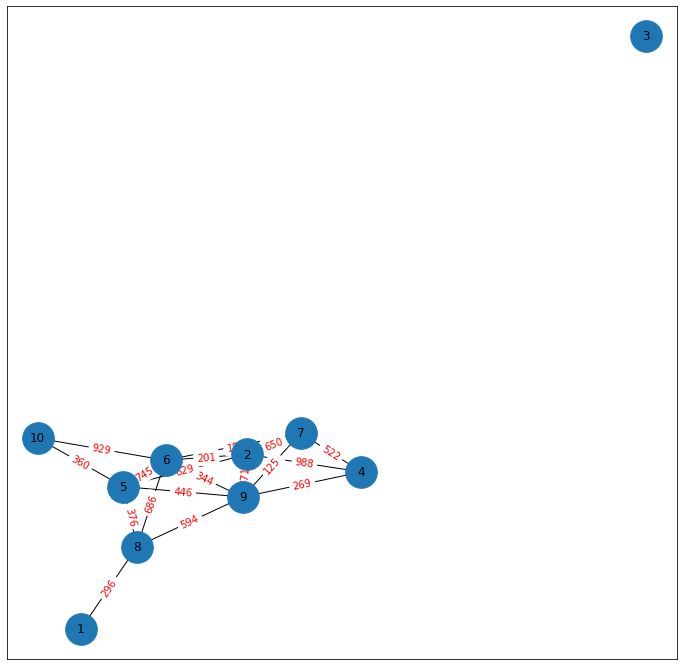



Visualize Best F-Measure Graph After Clustering when K = 10 , And F = 0.6266666666666667


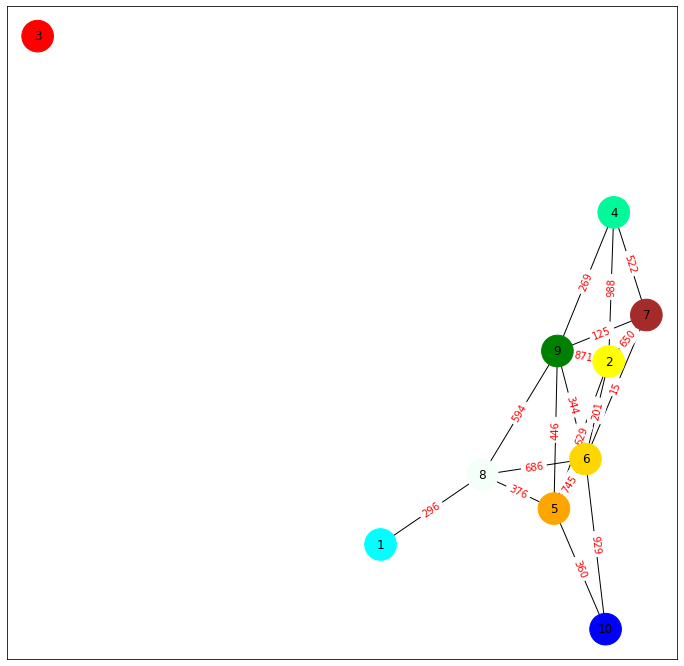



Visualize Best Entropy Graph After Clustering When K = 10 , And Entropy = 0.0


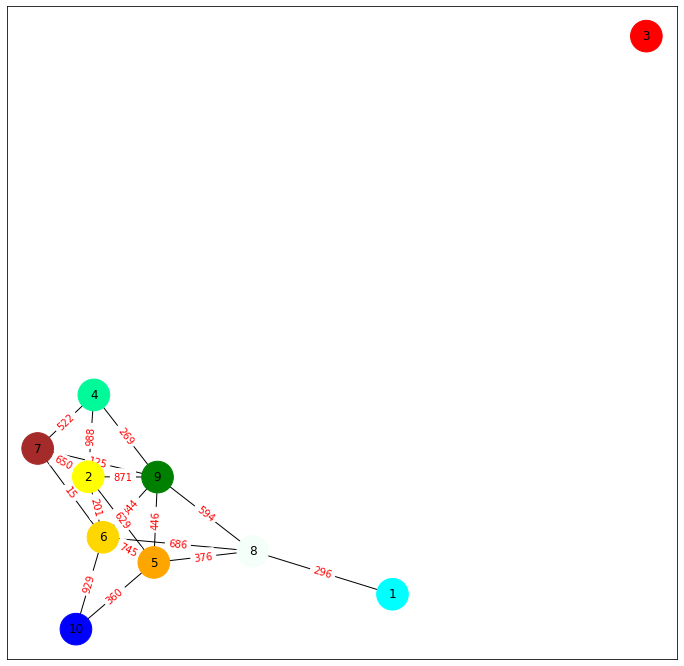



Topology size: 10 ,  file number: 1 , K: 2
Labels: 
[1 0 1 1 1 0 1 1 1 1]
External Evaluation for the topology: 
F-Measure: 0.48214285714285715
Conditional Entropy: 0.290056610142443



Topology size: 10 ,  file number: 1 , K: 4
Labels: 
[1 2 0 0 3 2 3 1 1 0]
External Evaluation for the topology: 
F-Measure: 0.5069444444444444
Conditional Entropy: 0.14313637641589874



Topology size: 10 ,  file number: 1 , K: 6
Labels: 
[3 2 1 1 0 2 0 5 3 4]
External Evaluation for the topology: 
F-Measure: 0.37301587301587297
Conditional Entropy: 0.12041199826559248



Topology size: 10 ,  file number: 1 , K: 8
Labels: 
[2 1 0 0 4 1 3 7 5 6]
External Evaluation for the topology: 
F-Measure: 0.3053571428571428
Conditional Entropy: 0.12041199826559248



Topology size: 10 ,  file number: 1 , K: 10
Labels: 
[3 1 9 4 6 2 7 5 8 0]
External Evaluation for the topology: 
F-Measure: 0.33142857142857135
Conditional Entropy: 0.0



Visualize Graph Before Clustering


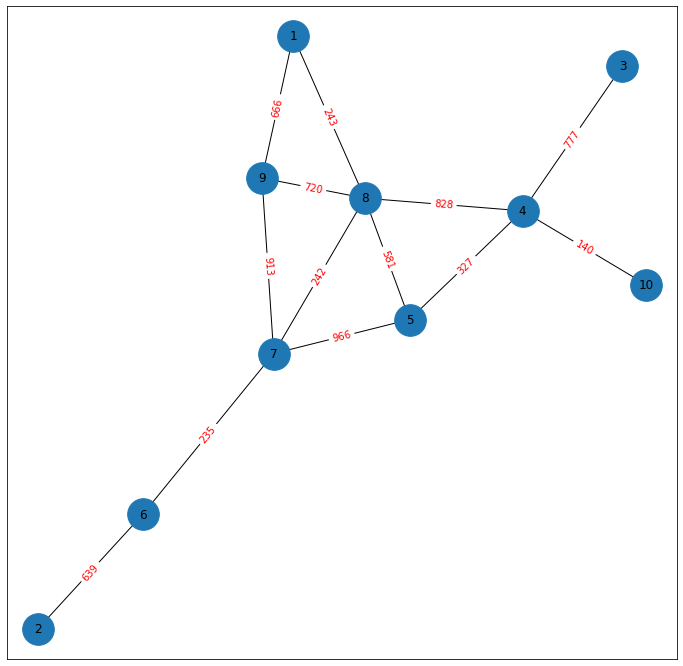



Visualize Best F-Measure Graph After Clustering when K = 4 , And F = 0.5069444444444444


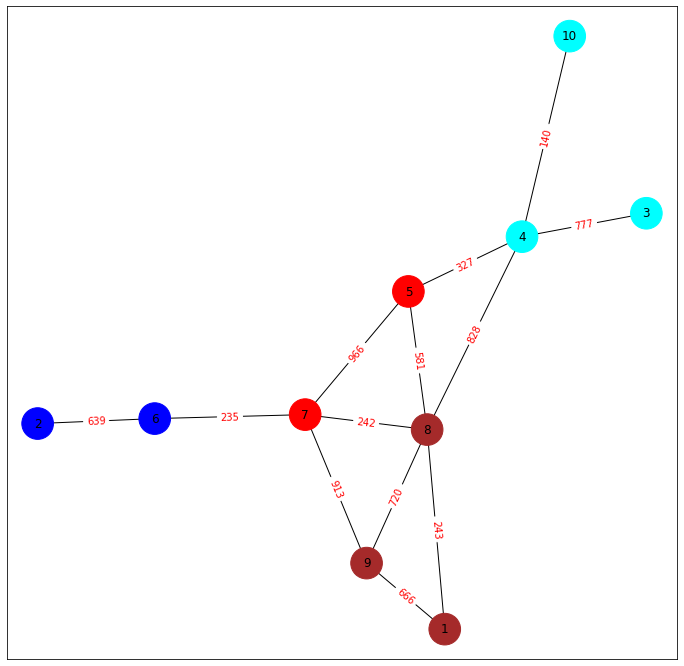



Visualize Best Entropy Graph After Clustering When K = 10 , And Entropy = 0.0


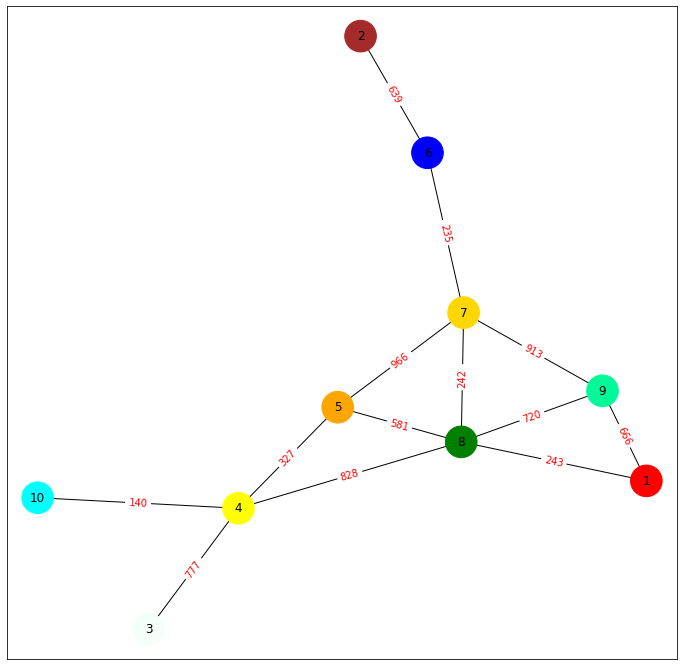



Topology size: 10 ,  file number: 2 , K: 2
Labels: 
[0 0 1 1 1 0 0 1 0 0]
External Evaluation for the topology: 
F-Measure: 0.6190476190476191
Conditional Entropy: 0.165860754566205



Topology size: 10 ,  file number: 2 , K: 4
Labels: 
[1 1 3 2 3 0 0 2 1 1]
External Evaluation for the topology: 
F-Measure: 0.6166666666666667
Conditional Entropy: 0.0



Topology size: 10 ,  file number: 2 , K: 6
Labels: 
[3 0 4 1 4 2 2 1 5 0]
External Evaluation for the topology: 
F-Measure: 0.4407407407407407
Conditional Entropy: 0.0



Topology size: 10 ,  file number: 2 , K: 8
Labels: 
[4 3 2 1 2 7 0 5 6 3]
External Evaluation for the topology: 
F-Measure: 0.37777777777777777
Conditional Entropy: 0.0



Topology size: 10 ,  file number: 2 , K: 10
Labels: 
[3 6 4 0 1 5 7 9 2 8]
External Evaluation for the topology: 
F-Measure: 0.3111111111111111
Conditional Entropy: 0.0



Visualize Graph Before Clustering


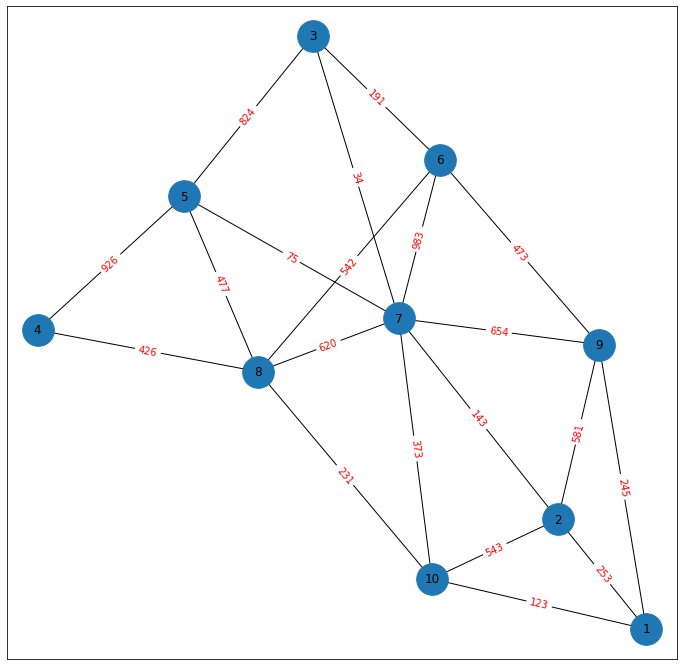



Visualize Best F-Measure Graph After Clustering when K = 2 , And F = 0.6190476190476191


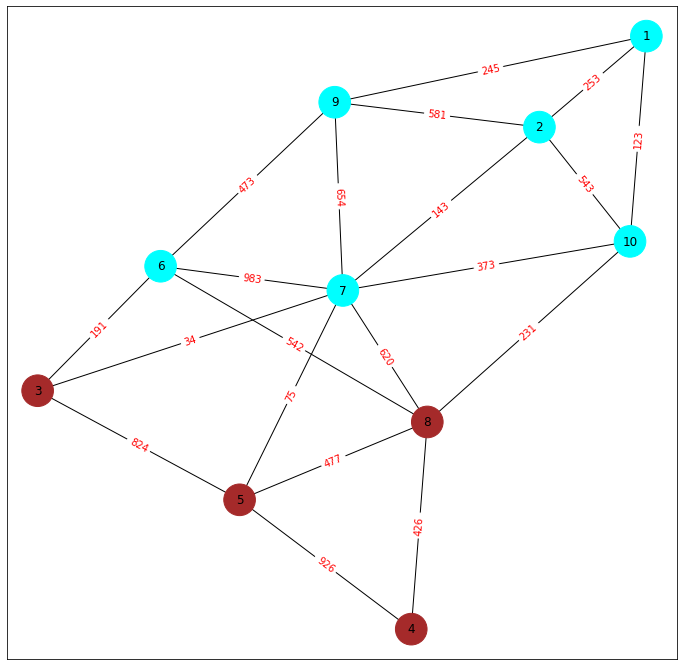



Visualize Best Entropy Graph After Clustering When K = 4 , And Entropy = 0.0


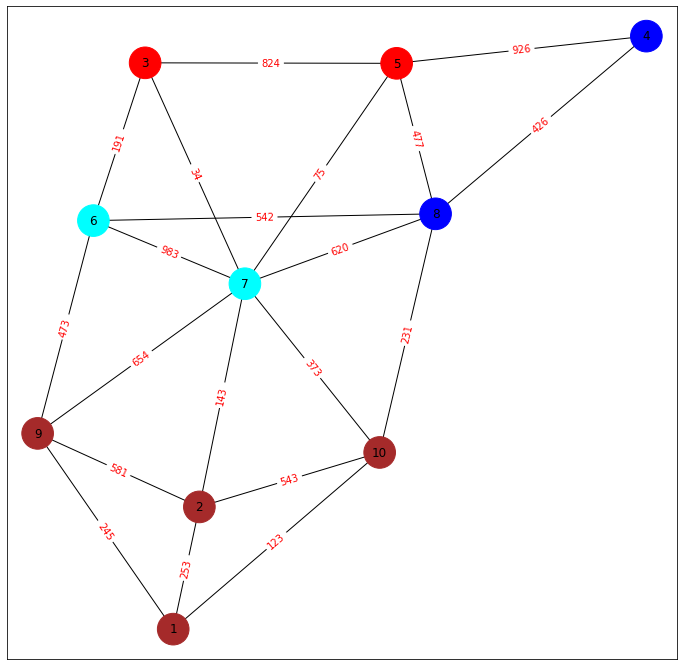



Topology size: 10 ,  file number: 3 , K: 2
Labels: 
[0 0 0 0 0 0 0 1 1 0]
External Evaluation for the topology: 
F-Measure: 0.48214285714285715
Conditional Entropy: 0.290056610142443



Topology size: 10 ,  file number: 3 , K: 4
Labels: 
[3 0 0 3 1 1 0 2 2 1]
External Evaluation for the topology: 
F-Measure: 0.44146825396825395
Conditional Entropy: 0.22606675369900125



Topology size: 10 ,  file number: 3 , K: 6
Labels: 
[0 1 4 0 5 3 1 2 2 3]
External Evaluation for the topology: 
F-Measure: 0.4337301587301587
Conditional Entropy: 0.06020599913279624



Topology size: 10 ,  file number: 3 , K: 8
Labels: 
[4 0 3 6 2 5 0 1 1 7]
External Evaluation for the topology: 
F-Measure: 0.3508928571428571
Conditional Entropy: 0.06020599913279624



Topology size: 10 ,  file number: 3 , K: 10
Labels: 
[4 6 0 5 8 7 1 2 3 9]
External Evaluation for the topology: 
F-Measure: 0.33142857142857135
Conditional Entropy: 0.0



Visualize Graph Before Clustering


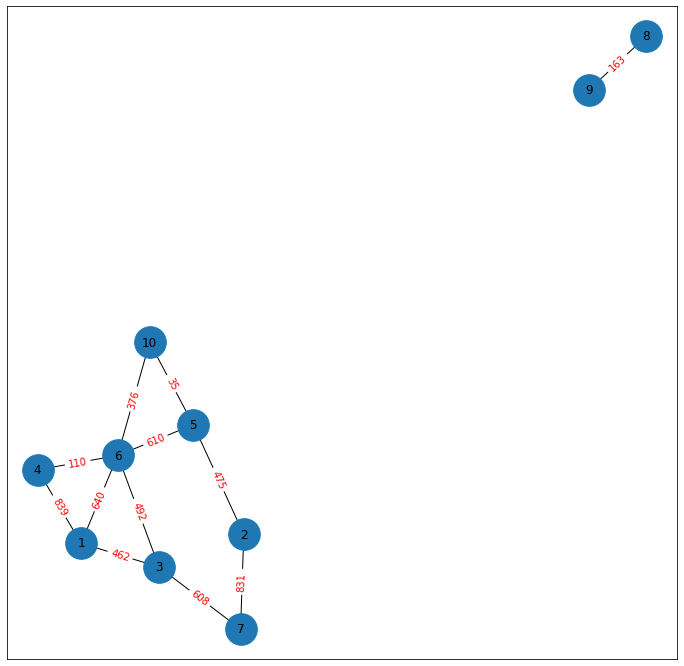



Visualize Best F-Measure Graph After Clustering when K = 2 , And F = 0.48214285714285715


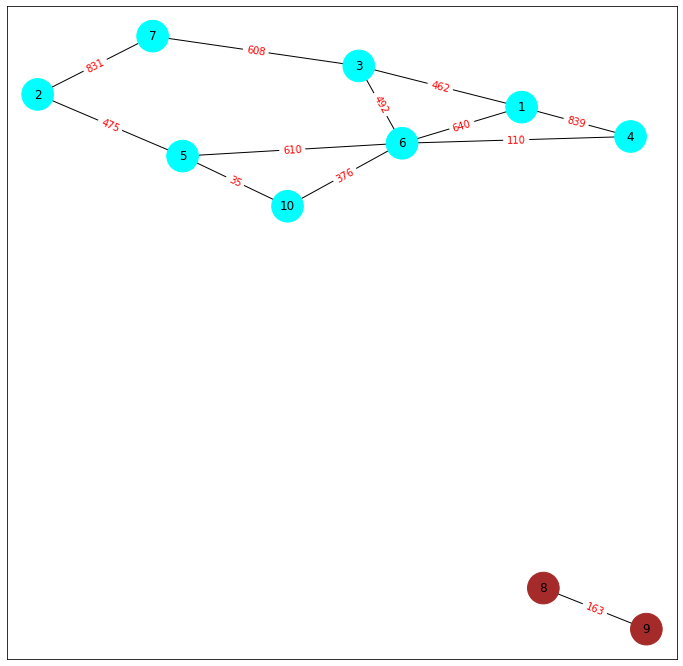



Visualize Best Entropy Graph After Clustering When K = 10 , And Entropy = 0.0


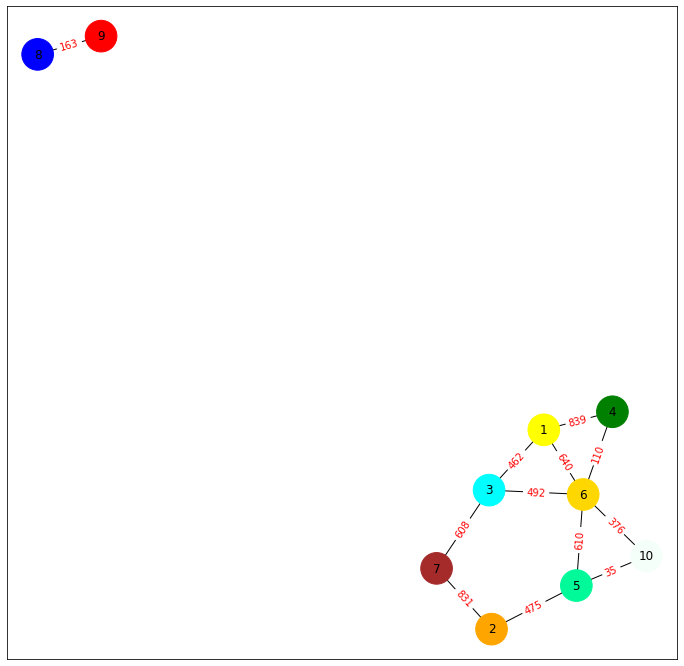



Topology size: 10 ,  file number: 4 , K: 2
Labels: 
[0 1 0 1 0 0 0 0 0 0]
External Evaluation for the topology: 
F-Measure: 0.4
Conditional Entropy: 0.5418539921951662



Topology size: 10 ,  file number: 4 , K: 4
Labels: 
[1 2 0 2 3 3 3 0 1 0]
External Evaluation for the topology: 
F-Measure: 0.475
Conditional Entropy: 0.3464787519645937



Topology size: 10 ,  file number: 4 , K: 6
Labels: 
[2 0 1 0 4 4 5 3 2 1]
External Evaluation for the topology: 
F-Measure: 0.5722222222222222
Conditional Entropy: 0.18061799739838874



Topology size: 10 ,  file number: 4 , K: 8
Labels: 
[7 1 4 1 6 2 0 5 3 2]
External Evaluation for the topology: 
F-Measure: 0.5374999999999999
Conditional Entropy: 0.12041199826559248



Topology size: 10 ,  file number: 4 , K: 10
Labels: 
[4 5 8 7 9 1 0 6 2 3]
External Evaluation for the topology: 
F-Measure: 0.5666666666666667
Conditional Entropy: 0.0



Visualize Graph Before Clustering


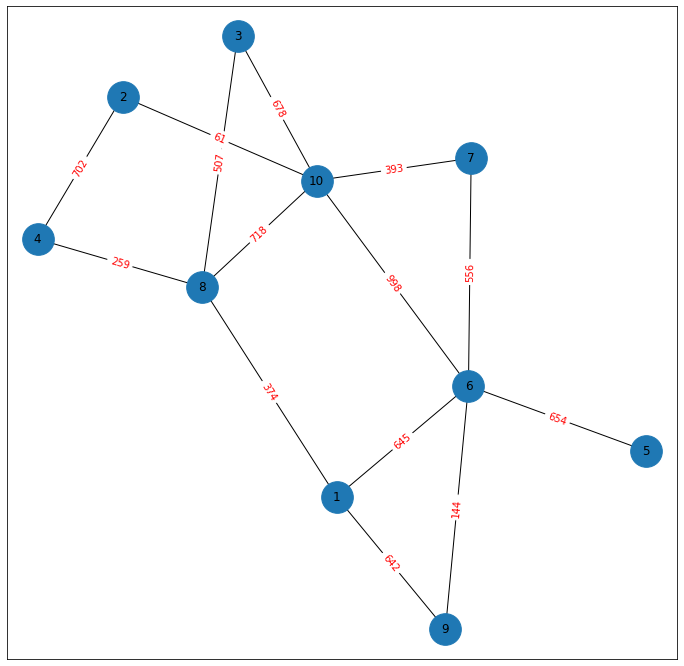



Visualize Best F-Measure Graph After Clustering when K = 6 , And F = 0.5722222222222222


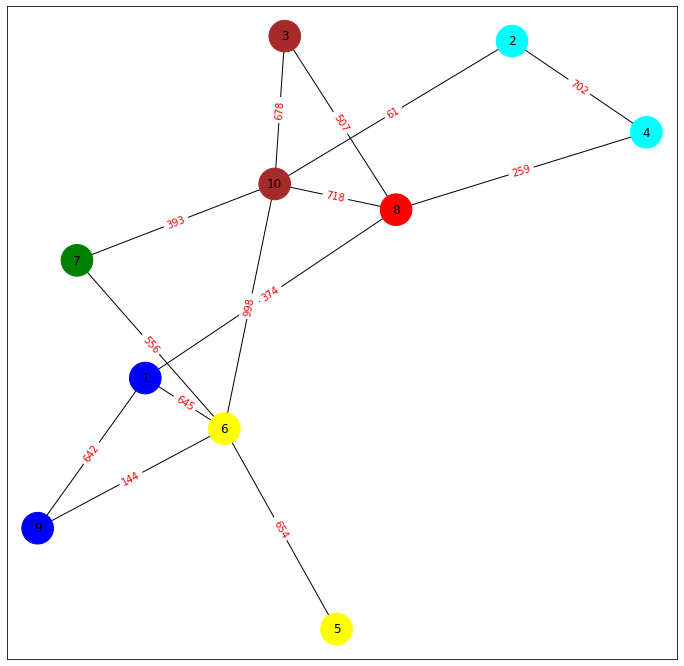



Visualize Best Entropy Graph After Clustering When K = 10 , And Entropy = 0.0


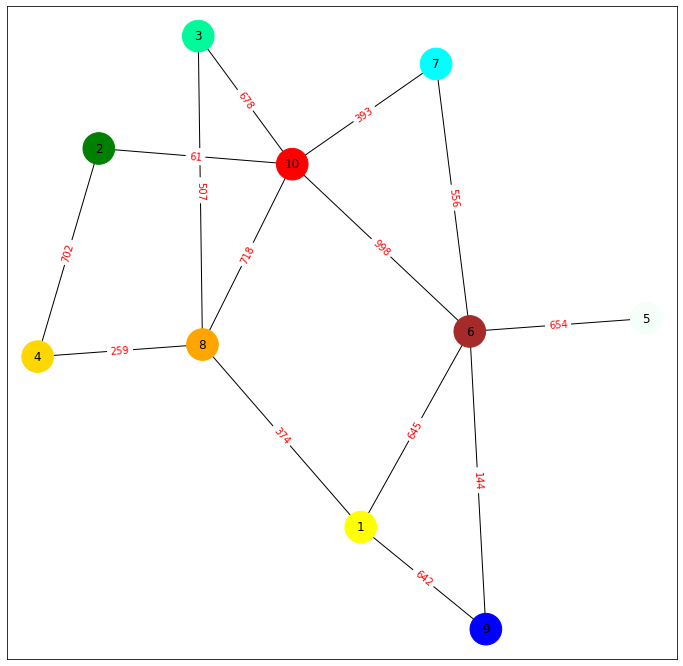



Topology size: 10 ,  file number: 5 , K: 2
Labels: 
[1 1 1 0 0 1 0 1 0 1]
External Evaluation for the topology: 
F-Measure: 0.4949494949494949
Conditional Entropy: 0.3010299956639812



Topology size: 10 ,  file number: 5 , K: 4
Labels: 
[2 0 2 1 1 0 3 2 3 2]
External Evaluation for the topology: 
F-Measure: 0.5952380952380953
Conditional Entropy: 0.09768762011528623



Topology size: 10 ,  file number: 5 , K: 6
Labels: 
[4 5 0 1 1 3 2 4 2 3]
External Evaluation for the topology: 
F-Measure: 0.3968253968253969
Conditional Entropy: 0.12041199826559248



Topology size: 10 ,  file number: 5 , K: 8
Labels: 
[3 2 0 4 7 5 1 6 1 0]
External Evaluation for the topology: 
F-Measure: 0.39285714285714296
Conditional Entropy: 0.0



Topology size: 10 ,  file number: 5 , K: 10
Labels: 
[5 6 1 7 4 9 0 8 3 2]
External Evaluation for the topology: 
F-Measure: 0.3333333333333334
Conditional Entropy: 0.0



Visualize Graph Before Clustering


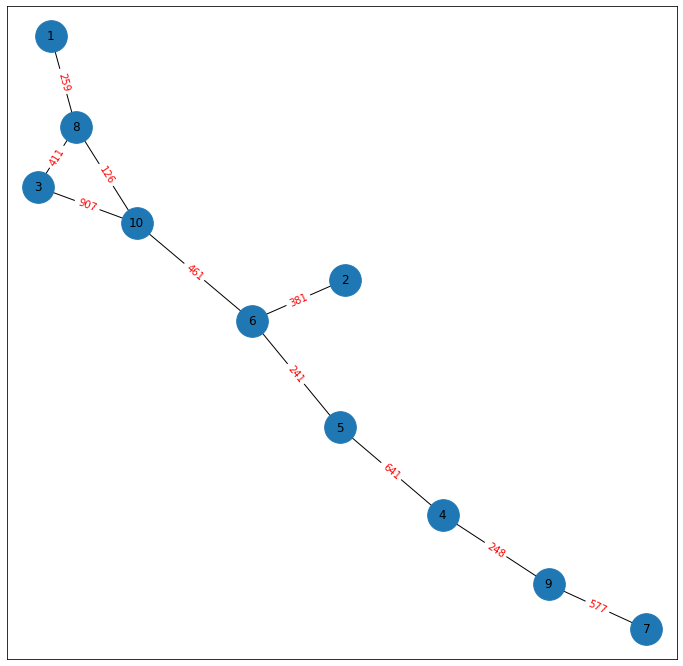



Visualize Best F-Measure Graph After Clustering when K = 4 , And F = 0.5952380952380953


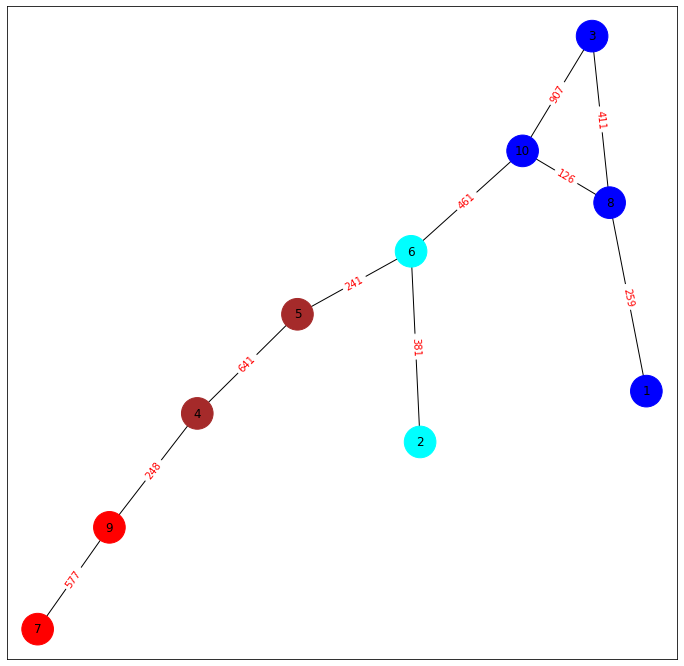



Visualize Best Entropy Graph After Clustering When K = 8 , And Entropy = 0.0


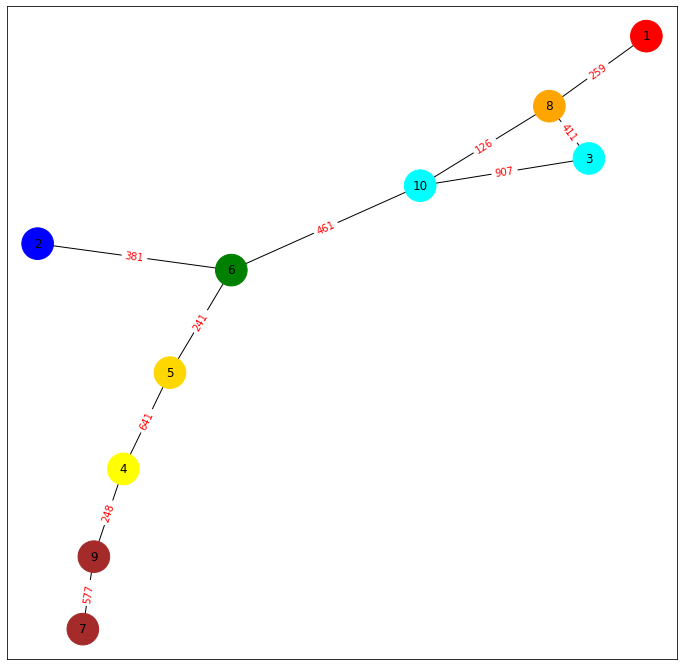



Topology size: 10 ,  file number: 6 , K: 2
Labels: 
[1 1 0 1 1 1 1 0 1 1]
External Evaluation for the topology: 
F-Measure: 0.6111111111111112
Conditional Entropy: 0.0



Topology size: 10 ,  file number: 6 , K: 4
Labels: 
[0 1 2 1 0 1 1 3 1 1]
External Evaluation for the topology: 
F-Measure: 0.36174242424242425
Conditional Entropy: 0.0



Topology size: 10 ,  file number: 6 , K: 6
Labels: 
[0 5 1 5 0 4 5 2 3 3]
External Evaluation for the topology: 
F-Measure: 0.278943278943279
Conditional Entropy: 0.0



Topology size: 10 ,  file number: 6 , K: 8
Labels: 
[0 1 2 3 0 6 3 4 5 7]
External Evaluation for the topology: 
F-Measure: 0.21969696969696972
Conditional Entropy: 0.0



Topology size: 10 ,  file number: 6 , K: 10
Labels: 
[0 9 3 2 7 8 1 5 4 6]
External Evaluation for the topology: 
F-Measure: 0.18181818181818185
Conditional Entropy: 0.0



Visualize Graph Before Clustering


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


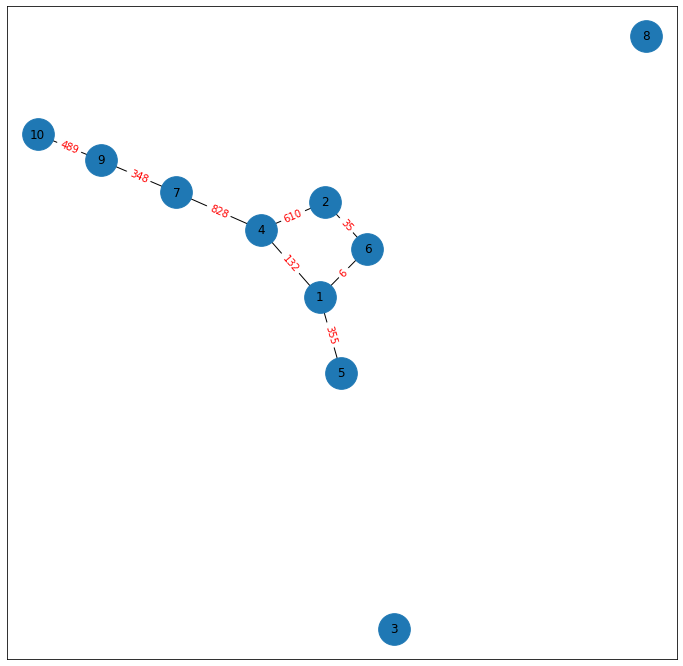



Visualize Best F-Measure Graph After Clustering when K = 2 , And F = 0.6111111111111112


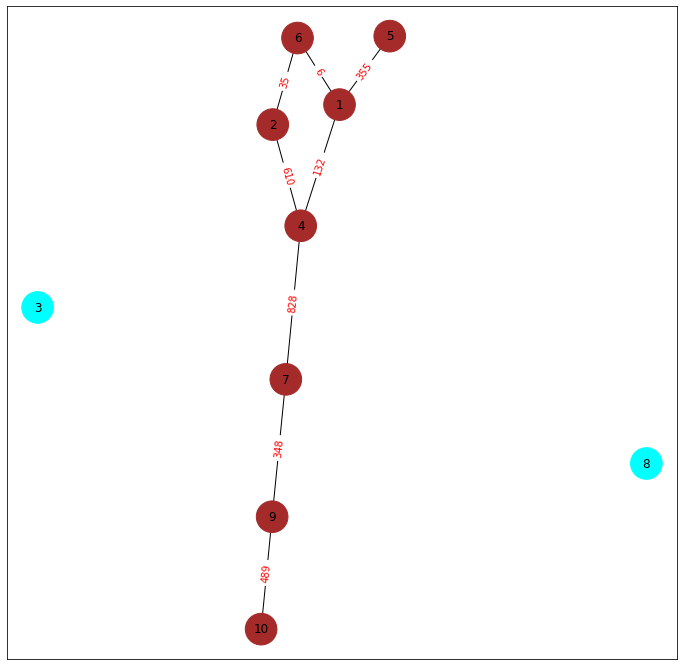



Visualize Best Entropy Graph After Clustering When K = 2 , And Entropy = 0.0


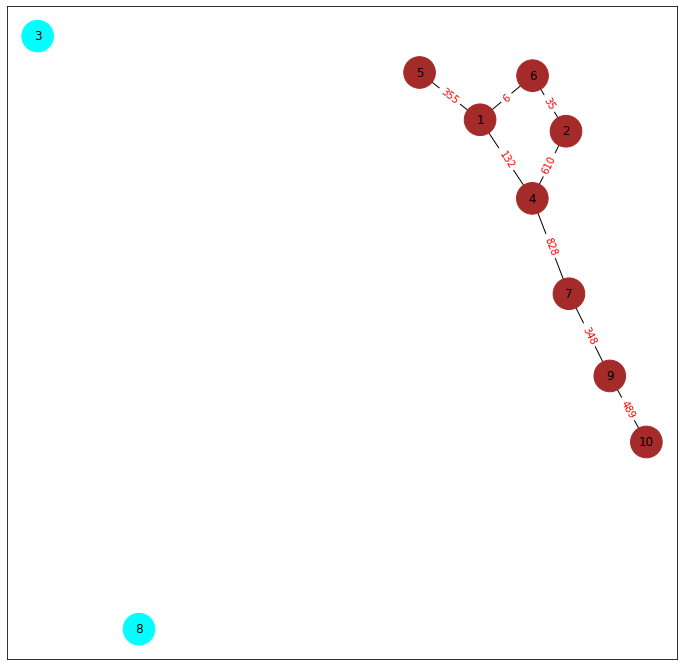



Topology size: 10 ,  file number: 7 , K: 2
Labels: 
[0 0 1 1 0 0 1 1 1 0]
External Evaluation for the topology: 
F-Measure: 0.6
Conditional Entropy: 0.29228525323862886



Topology size: 10 ,  file number: 7 , K: 4
Labels: 
[2 0 1 1 0 2 3 3 1 0]
External Evaluation for the topology: 
F-Measure: 0.5267857142857143
Conditional Entropy: 0.14313637641589874



Topology size: 10 ,  file number: 7 , K: 6
Labels: 
[1 5 0 3 4 1 2 2 0 4]
External Evaluation for the topology: 
F-Measure: 0.3968253968253969
Conditional Entropy: 0.12041199826559248



Topology size: 10 ,  file number: 7 , K: 8
Labels: 
[6 2 1 5 4 3 0 7 1 3]
External Evaluation for the topology: 
F-Measure: 0.39285714285714296
Conditional Entropy: 0.0



Topology size: 10 ,  file number: 7 , K: 10
Labels: 
[0 3 1 8 7 6 4 9 2 5]
External Evaluation for the topology: 
F-Measure: 0.3333333333333334
Conditional Entropy: 0.0



Visualize Graph Before Clustering


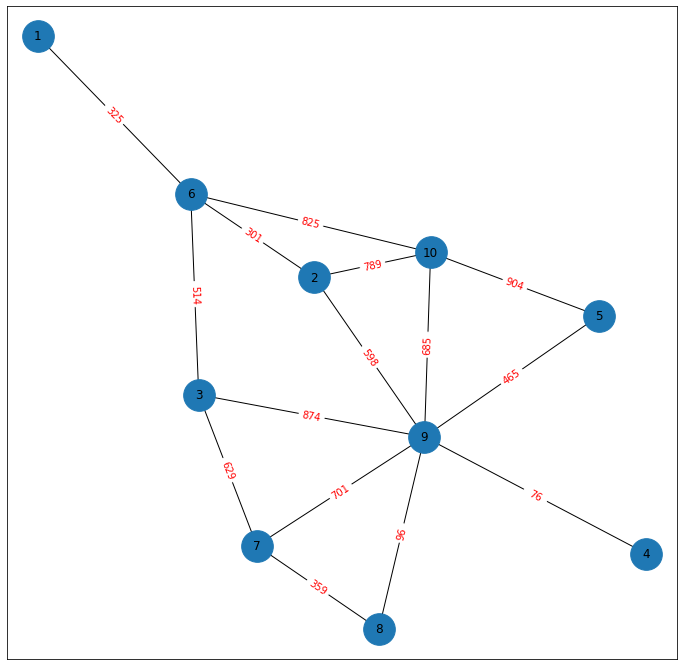



Visualize Best F-Measure Graph After Clustering when K = 2 , And F = 0.6


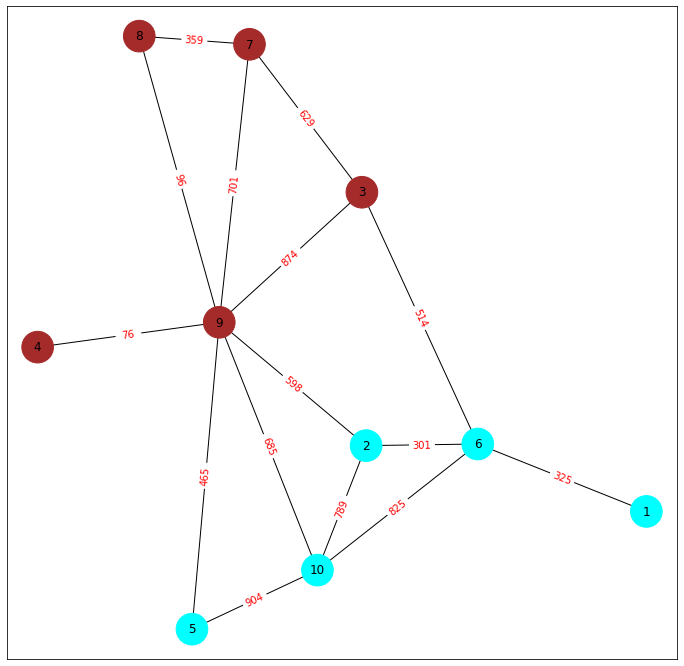



Visualize Best Entropy Graph After Clustering When K = 8 , And Entropy = 0.0


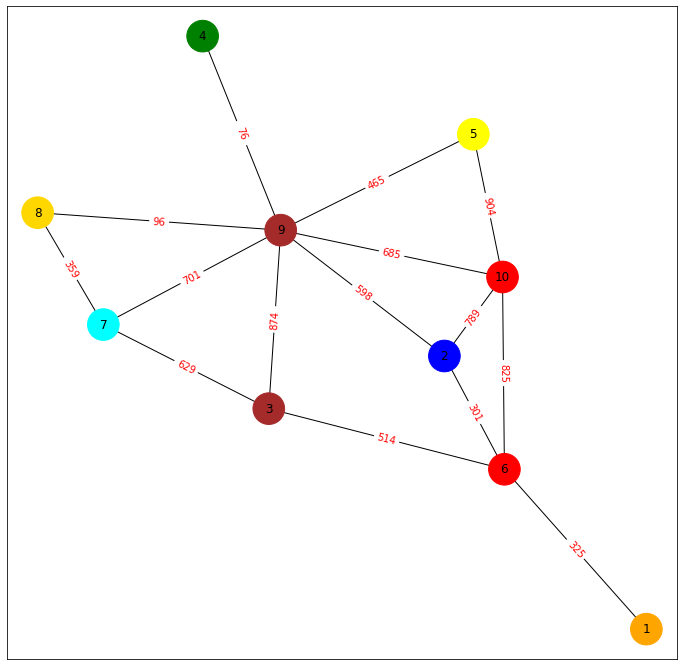



Topology size: 10 ,  file number: 8 , K: 2
Labels: 
[0 0 0 0 0 0 0 0 0 1]
External Evaluation for the topology: 
F-Measure: 0.4307692307692308
Conditional Entropy: 0.5123395065307986



Topology size: 10 ,  file number: 8 , K: 4
Labels: 
[0 0 3 0 1 3 1 0 1 2]
External Evaluation for the topology: 
F-Measure: 0.4916666666666667
Conditional Entropy: 0.2635483746814912



Topology size: 10 ,  file number: 8 , K: 6
Labels: 
[0 0 2 1 3 2 5 1 3 4]
External Evaluation for the topology: 
F-Measure: 0.4444444444444444
Conditional Entropy: 0.18061799739838874



Topology size: 10 ,  file number: 8 , K: 8
Labels: 
[5 0 1 3 3 1 7 4 6 2]
External Evaluation for the topology: 
F-Measure: 0.4708333333333333
Conditional Entropy: 0.12041199826559248



Topology size: 10 ,  file number: 8 , K: 10
Labels: 
[0 5 6 8 7 4 3 1 9 2]
External Evaluation for the topology: 
F-Measure: 0.5433333333333333
Conditional Entropy: 0.0



Visualize Graph Before Clustering


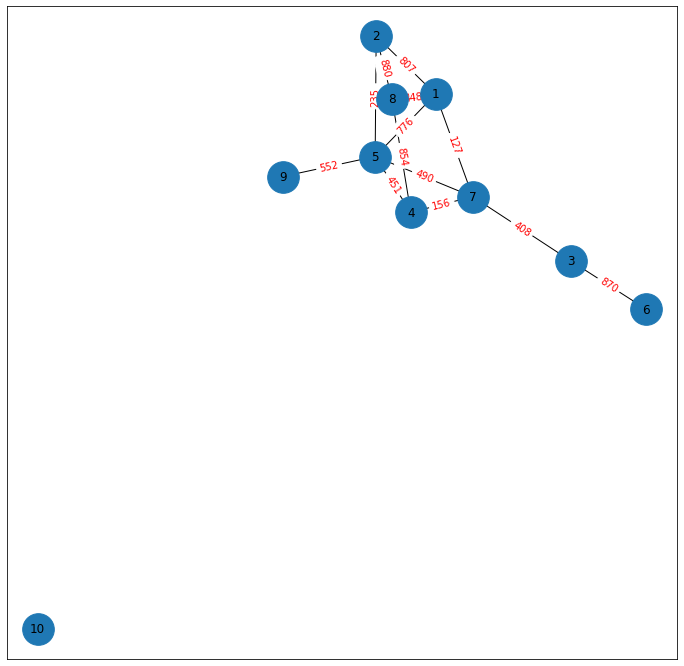



Visualize Best F-Measure Graph After Clustering when K = 10 , And F = 0.5433333333333333


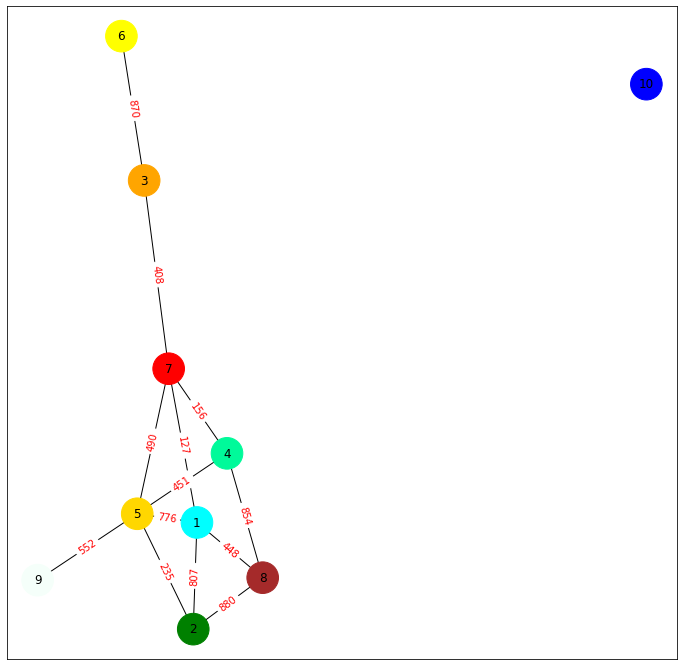



Visualize Best Entropy Graph After Clustering When K = 10 , And Entropy = 0.0


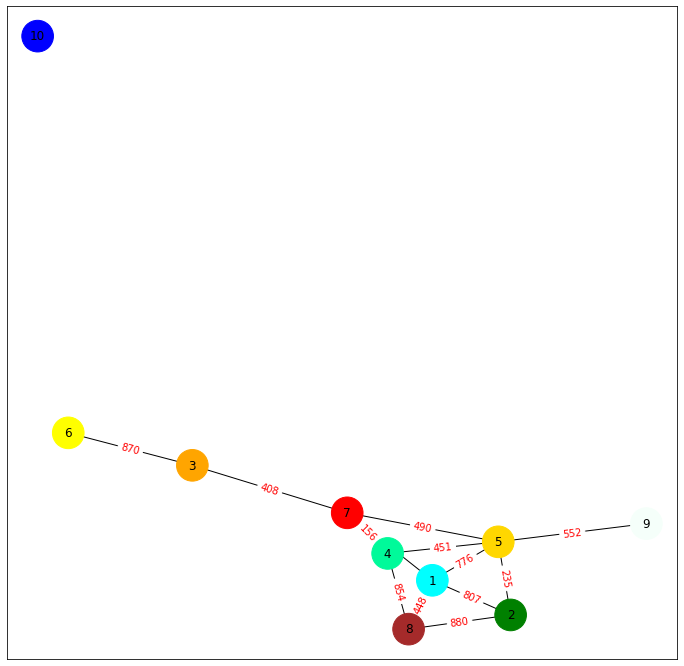



Topology size: 10 ,  file number: 9 , K: 2
Labels: 
[0 0 0 1 0 0 0 0 0 0]
External Evaluation for the topology: 
F-Measure: 0.5645933014354068
Conditional Entropy: 0.0



Topology size: 10 ,  file number: 9 , K: 4
Labels: 
[2 1 2 3 1 2 0 1 2 2]
External Evaluation for the topology: 
F-Measure: 0.372960372960373
Conditional Entropy: 0.0



Topology size: 10 ,  file number: 9 , K: 6
Labels: 
[1 0 5 2 4 1 3 0 1 1]
External Evaluation for the topology: 
F-Measure: 0.2720057720057721
Conditional Entropy: 0.0



Topology size: 10 ,  file number: 9 , K: 8
Labels: 
[0 1 4 3 7 0 5 1 6 2]
External Evaluation for the topology: 
F-Measure: 0.21969696969696975
Conditional Entropy: 0.0



Topology size: 10 ,  file number: 9 , K: 10
Labels: 
[2 6 9 4 3 0 8 5 1 7]
External Evaluation for the topology: 
F-Measure: 0.18181818181818185
Conditional Entropy: 0.0



Visualize Graph Before Clustering


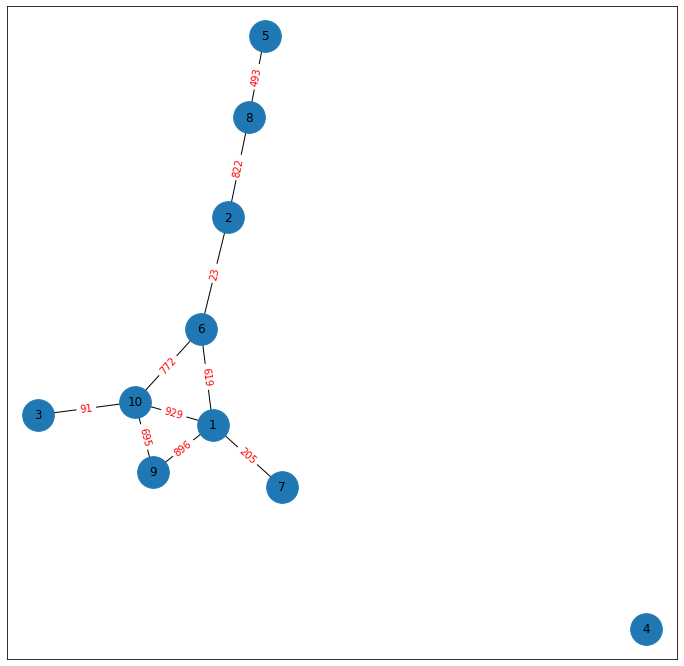



Visualize Best F-Measure Graph After Clustering when K = 2 , And F = 0.5645933014354068


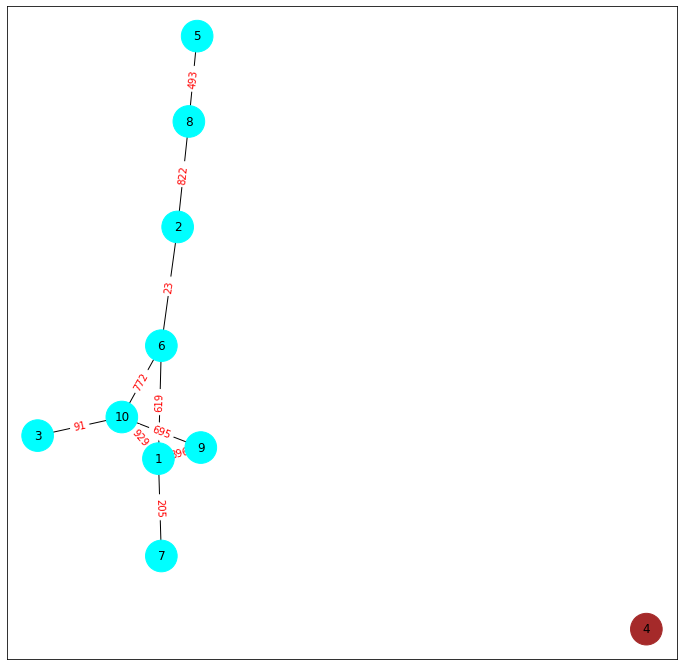



Visualize Best Entropy Graph After Clustering When K = 2 , And Entropy = 0.0


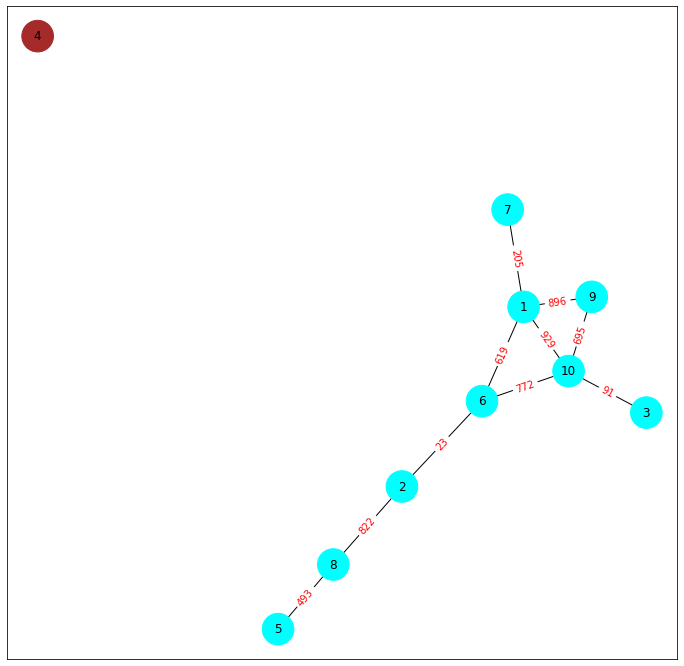

In [ ]:

# for topology of size 10
k_th = [2,4,6,8,10]
topology_size = 10
topology_mapping(k_th, topology_size)

In [23]:
k_th = [2,10,12,15,17,20,25]
topology_size = 50
topology_mapping(k_th, topology_size)

Output hidden; open in https://colab.research.google.com to view.

In [24]:
k_th = [2,10,12,15,17,20,25]
topology_size = 100
topology_mapping(k_th, topology_size)

Output hidden; open in https://colab.research.google.com to view.